In [37]:
import pandas as pd
import numpy as np
import os 
os.chdir(r"C:\Users\dai\Desktop\S-AI\MachineLearning\Day12\Datasets")
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import root_mean_squared_error

In [39]:
passengers = pd.read_csv("AirPassengers.csv",index_col=0)

In [41]:
y = passengers['Passengers']

In [43]:
y_train = y[:132]
y_test = y[132:]
y_train.shape, y_test.shape

((132,), (12,))

In [45]:
print(y_train.index)
print(y_test.index)

Index(['1949-01', '1949-02', '1949-03', '1949-04', '1949-05', '1949-06',
       '1949-07', '1949-08', '1949-09', '1949-10',
       ...
       '1959-03', '1959-04', '1959-05', '1959-06', '1959-07', '1959-08',
       '1959-09', '1959-10', '1959-11', '1959-12'],
      dtype='object', name='Month', length=132)
Index(['1960-01', '1960-02', '1960-03', '1960-04', '1960-05', '1960-06',
       '1960-07', '1960-08', '1960-09', '1960-10', '1960-11', '1960-12'],
      dtype='object', name='Month')


In [47]:
span = 3
fcast = y_train.rolling(span, center=True).mean()
fcast

Month
1949-01           NaN
1949-02    120.666667
1949-03    126.333333
1949-04    127.333333
1949-05    128.333333
              ...    
1959-08    523.333333
1959-09    476.333333
1959-10    410.666667
1959-11    391.333333
1959-12           NaN
Name: Passengers, Length: 132, dtype: float64

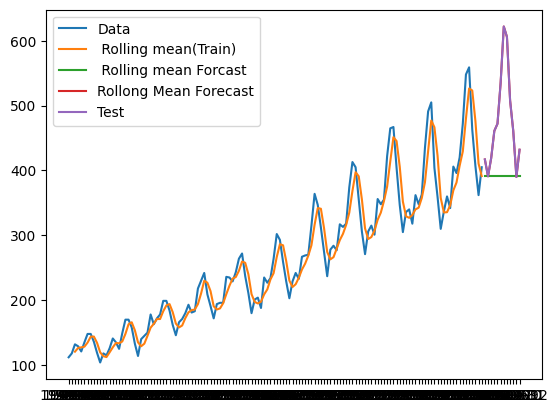

In [49]:
span = 3
fcast = y_train.rolling(span, center=False).mean()## False means Trailing rolling mean and True means center rolling mean
MA =fcast.iloc[-1]
MA_fcast = pd.Series(MA.repeat(len(y_test)), index=y_test.index) 

plt.plot(y_train, label='Data')
plt.plot(fcast,label=' Rolling mean(Train)')
plt.plot(MA_fcast,label=' Rolling mean Forcast')
plt.plot(y_test, label='Rollong Mean Forecast')
plt.plot(y_test,label='Test')
plt.legend(loc='best')
plt.show()

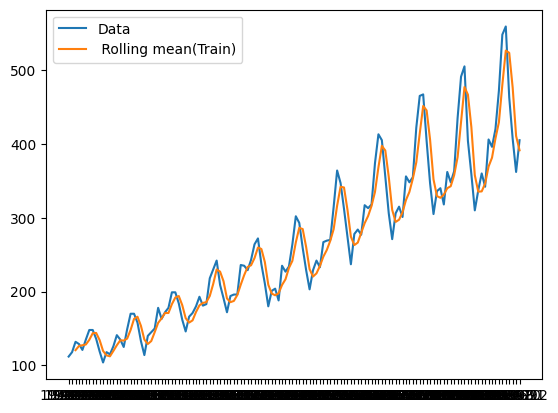

In [50]:
span = 3
fcast = y_train.rolling(span, center=False).mean()## False means Trailing rolling mean and True means center rolling mean
MA =fcast.iloc[-1]
MA_fcast = pd.Series(MA.repeat(len(y_test)), index=y_test.index) 

plt.plot(y_train, label='Data')
plt.plot(fcast,label=' Rolling mean(Train)')

plt.legend(loc='best')
plt.show()

In [70]:
span = 6
fcast = y_train.rolling(span, center=False).mean()
MA =fcast.iloc[-1]
MA_fcast = pd.Series(MA.repeat(len(y_test)), index=y_test.index) 
root_mean_squared_error(y_test, MA_fcast)

76.77347632266412

In [72]:
span = 7
fcast = y_train.rolling(span, center=False).mean()
MA =fcast.iloc[-1]
MA_fcast = pd.Series(MA.repeat(len(y_test)), index=y_test.index) 
root_mean_squared_error(y_test, MA_fcast)

76.28653914303472

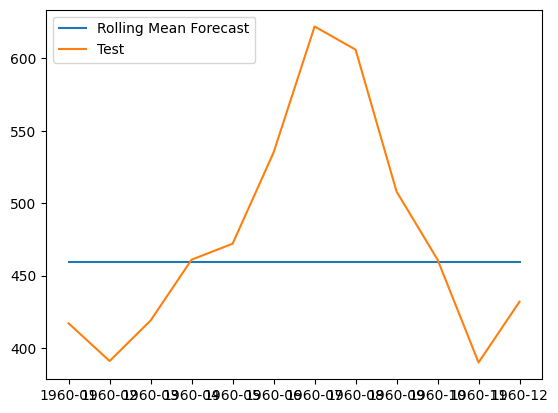

In [74]:
plt.plot(MA_fcast, label='Rolling Mean Forecast')
plt.plot(y_test, label='Test')
plt.legend(loc='best')
plt.show()

## Simple Exponential Smoothing Forcasting 

In [122]:
from statsmodels.tsa.api import SimpleExpSmoothing
alpha = 0.2
ses = SimpleExpSmoothing(y_train)
fit1 = ses.fit(smoothing_level=alpha)
fcast1 = fit1.forecast(len(y_test)) 

C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\pandas\util\_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


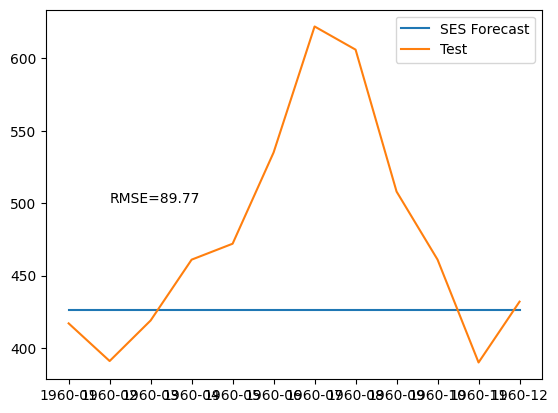

In [124]:
ses_fcast = pd.Series(fcast1, index= y_test.index)
error = round(root_mean_squared_error(y_test,ses_fcast), 2 )
plt.text(1,500,"RMSE="+str(error))
plt.plot(ses_fcast,
         label='SES Forecast')
plt.plot(y_test,label='Test')
plt.legend(loc='best')
plt.show()

## Holt's Linear Trend

In [130]:
from statsmodels.tsa.api import Holt

In [134]:
holt = Holt(y_train)
alpha, beta = 0.2, 0.4
fit1 = holt.fit(smoothing_level=alpha, smoothing_trend= beta)
fcast1 = fit1.forecast(len(y_test))

C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\pandas\util\_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


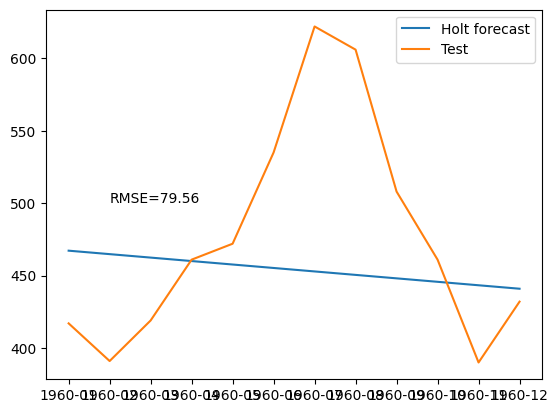

In [148]:
holt_fcast = pd.Series(fcast1, index= y_test.index)
error = round(root_mean_squared_error(y_test, holt_fcast), 2)
plt.text(1,500, "RMSE="+str(error))
plt.plot(holt_fcast,label= "Holt forecast")
plt.plot(y_test, label = 'Test')
plt.legend(loc='best')
plt.show()

## Holt's Exponential Method

In [238]:
holt = Holt(y_train, exponential=True)
#alpha, beta = 0.2, 0.4
fit1 = holt.fit() #smoothing_level=alpha, smoothing_trend= beta
fcast1 = fit1.forecast(len(y_test))

C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


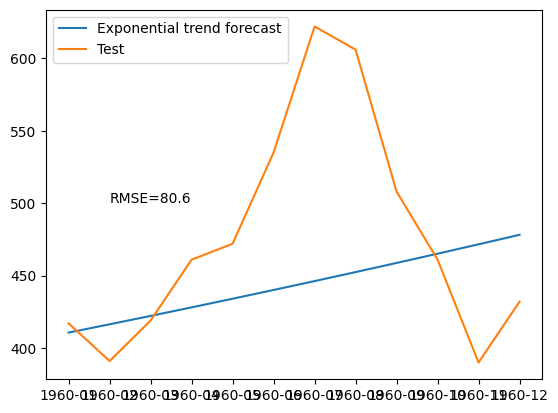

In [234]:
holt_fcast = pd.Series(fcast1, index= y_test.index)
error = round(root_mean_squared_error(y_test, holt_fcast), 2)
plt.text(1,500, "RMSE="+str(error))
plt.plot(holt_fcast,label= "Exponential trend forecast")
plt.plot(y_test, label = 'Test')
plt.legend(loc='best')
plt.show()

In [236]:
holt.params

{'smoothing_level': 0.999993755315562,
 'smoothing_trend': 0.02593644503321431,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 112.0,
 'initial_trend': 1.0535714285714286,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

## Additive  Damped Trend

C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\pandas\util\_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


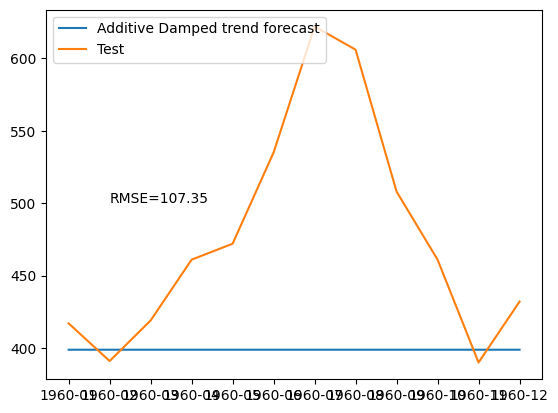

In [170]:
alpha, beta, phi = 0.8,0.02, 0.1
add_damp = Holt(y_train, damped_trend=True)
fit3 = add_damp.fit(smoothing_level = alpha, smoothing_trend = beta, damping_trend = phi)
fcast3 = fit3.forecast(len(y_test))
damp_fcast = pd.Series(fcast3, index= y_test.index)
error = round(root_mean_squared_error(y_test, holt_fcast), 2)
plt.text(1,500, "RMSE="+str(error))
plt.plot(holt_fcast,label= "Additive Damped trend forecast")
plt.plot(y_test, label = 'Test')
plt.legend(loc='best')
plt.show()

In [242]:
add_damp.params

{'smoothing_level': 0.8,
 'smoothing_trend': 0.02,
 'smoothing_seasonal': nan,
 'damping_trend': 0.1,
 'initial_level': 112.0,
 'initial_trend': 12.595825629568957,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

## Multiplicative Damping

C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


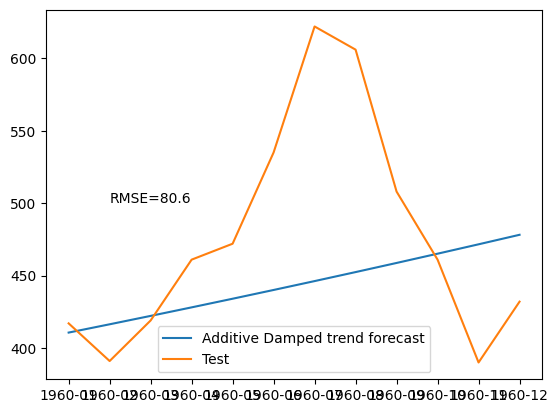

In [246]:
#alpha, beta, phi = 0.8,0.02, 0.1
add_damp = Holt(y_train, damped_trend=True,exponential = True)
fit3 = add_damp.fit() #smoothing_level = alpha, smoothing_trend = beta, damping_trend = phi
fcast3 = fit3.forecast(len(y_test))
damp_fcast = pd.Series(fcast3, index= y_test.index)
error = round(root_mean_squared_error(y_test, holt_fcast), 2)
plt.text(1,500, "RMSE="+str(error))
plt.plot(holt_fcast,label= "Additive Damped trend forecast")
plt.plot(y_test, label = 'Test')
plt.legend(loc='best')
plt.show()

In [250]:
add_damp.params

{'smoothing_level': 0.9999999850988388,
 'smoothing_trend': 0.0,
 'smoothing_seasonal': nan,
 'damping_trend': 0.8,
 'initial_level': 112.0,
 'initial_trend': 1.5450515483095022,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

## Holt- winter Seasonal Additive trend method

In [257]:
from statsmodels.tsa.api import ExponentialSmoothing

## it auto tune the best parameters happens in all Smoothing func

C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


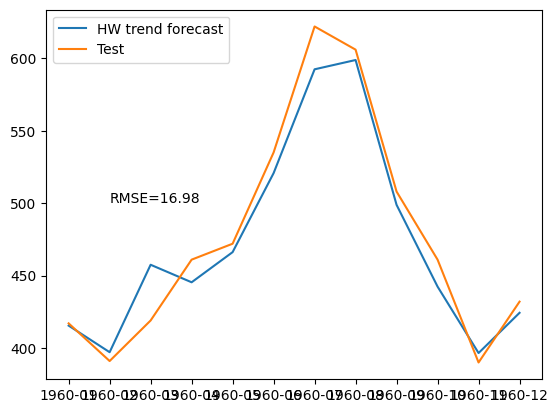

In [222]:
#alpha, beta, gamma = 0.2,0.1, 0.9
hw_a = ExponentialSmoothing(y_train, seasonal_periods=12, trend = 'add', seasonal ='add')
fit3 = hw_a.fit() #smoothing_level = alpha, smoothing_trend = beta, smoothing_seasonal = gamma
fcast3 = fit3.forecast(len(y_test))
hw_a_fcast = pd.Series(fcast3, index= y_test.index)
error = round(root_mean_squared_error(y_test, hw_a_fcast), 2)
plt.text(1,500, "RMSE="+str(error))
plt.plot(hw_a_fcast,label= "HW trend forecast")
plt.plot(y_test, label = 'Test')
plt.legend(loc='best')
plt.show()

## Best Parameters resulted through  auto tuning

In [230]:
hw_a.params['smoothing_level'], hw_a.params['smoothing_trend'], hw_a.params['smoothing_seasonal']

(0.2511602380805673, 0.0, 0.7488397619194327)

## ## Holt- winter Seasonal Multiplicative trend method

C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


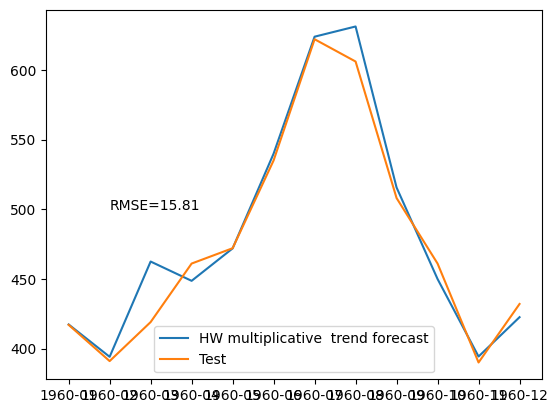

In [292]:
#alpha, beta, gamma = 0.2,0.1, 0.9
hw_m = ExponentialSmoothing(y_train, seasonal_periods=12, trend = 'add', seasonal ='mul')
fit3 = hw_m.fit() #smoothing_level = alpha, smoothing_trend = beta, smoothing_seasonal = gamma
fcast3 = fit3.forecast(len(y_test))
hw_m_fcast = pd.Series(fcast3, index= y_test.index)
error = round(root_mean_squared_error(y_test, hw_m_fcast), 2)
plt.text(1,500, "RMSE="+str(error))
plt.plot(hw_m_fcast,label= "HW multiplicative  trend forecast")
plt.plot(y_test, label = 'Test')
plt.legend(loc='best')
plt.show()

In [275]:
hw_m.params['smoothing_level'], hw_m.params['smoothing_trend'], hw_m.params['smoothing_seasonal']

(0.3762187726019837, 3.371259010313518e-08, 0.623781224096712)

In [279]:
hw_m.params

{'smoothing_level': 0.3762187726019837,
 'smoothing_trend': 3.371259010313518e-08,
 'smoothing_seasonal': 0.623781224096712,
 'damping_trend': nan,
 'initial_level': 108.47601338925654,
 'initial_trend': 2.6264593769167313,
 'initial_seasons': array([1.00806283, 1.06124908, 1.16644509, 1.10891731, 1.02478783,
        1.12022575, 1.2190533 , 1.20297682, 1.09681675, 0.95615313,
        0.85040862, 0.9807891 ]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

## Damped + Holt winters

C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


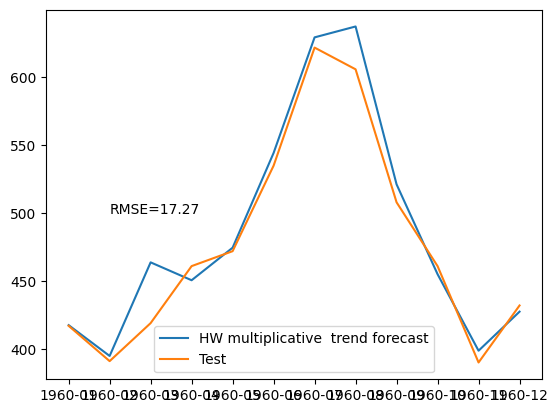

In [294]:
#alpha, beta, gamma = 0.2,0.1, 0.9
hw_m = ExponentialSmoothing(y_train, seasonal_periods=12, trend = 'add', seasonal ='mul', damped_trend = True)
fit3 = hw_m.fit() #smoothing_level = alpha, smoothing_trend = beta, smoothing_seasonal = gamma
fcast3 = fit3.forecast(len(y_test))
hw_m_fcast = pd.Series(fcast3, index= y_test.index)
error = round(root_mean_squared_error(y_test, hw_m_fcast), 2)
plt.text(1,500, "RMSE="+str(error))
plt.plot(hw_m_fcast,label= "HW multiplicative  trend forecast")
plt.plot(y_test, label = 'Test')
plt.legend(loc='best')
plt.show()

C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


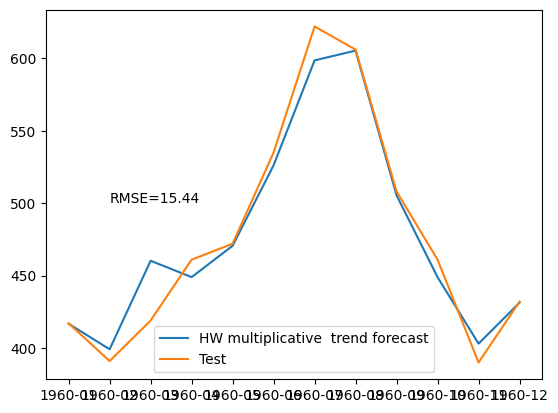

In [296]:
#alpha, beta, gamma = 0.2,0.1, 0.9
hw_m = ExponentialSmoothing(y_train, seasonal_periods=12, trend = 'add', seasonal ='add', damped_trend = True)
fit3 = hw_m.fit() #smoothing_level = alpha, smoothing_trend = beta, smoothing_seasonal = gamma
fcast3 = fit3.forecast(len(y_test))
hw_m_fcast = pd.Series(fcast3, index= y_test.index)
error = round(root_mean_squared_error(y_test, hw_m_fcast), 2)
plt.text(1,500, "RMSE="+str(error))
plt.plot(hw_m_fcast,label= "HW multiplicative  trend forecast")
plt.plot(y_test, label = 'Test')
plt.legend(loc='best')
plt.show()